In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
dataset='/content/drive/MyDrive/ML/outbreak_detect.csv'
import pandas as pd
df=pd.read_csv(dataset)


In [27]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,No
1,34,23,83.27,15.22,10717,677,Yes
2,40,23,50.74,0.00,1257,127,No
3,34,24,59.16,9.06,4198,211,No
4,34,27,73.23,0.00,11808,712,Yes
5,31,24,88.77,41.40,10881,648,Yes
6,33,24,77.94,23.88,8830,459,Yes
7,31,24,84.57,11.15,9693,482,No
8,36,24,53.40,2.12,9310,549,No
9,32,23,57.50,0.00,13154,838,Yes


In [28]:
df.shape


(23, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      23 non-null     int64  
 1   minTemp      23 non-null     int64  
 2   avgHumidity  23 non-null     float64
 3   Rainfall     23 non-null     float64
 4   Positive     23 non-null     int64  
 5   pf           23 non-null     int64  
 6   Outbreak     23 non-null     object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ KB


In [30]:
#Label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
df['Outbreak']=label_encoder.fit_transform(df['Outbreak'])

X=df.drop(['Outbreak'],axis=1)
Y=df['Outbreak']
print(X)
print(Y)

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf
0        29       18        49.74      0.00      2156  112
1        34       23        83.27     15.22     10717  677
2        40       23        50.74      0.00      1257  127
3        34       24        59.16      9.06      4198  211
4        34       27        73.23      0.00     11808  712
5        31       24        88.77     41.40     10881  648
6        33       24        77.94     23.88      8830  459
7        31       24        84.57     11.15      9693  482
8        36       24        53.40      2.12      9310  549
9        32       23        57.50      0.00     13154  838
10       34       18        59.40      0.00      2197  136
11       42       24        49.43      2.19      3362  213
12       45       32        34.74      0.38       416   26
13       43       28        69.07      4.65      7514  410
14       33       23        80.97      6.92     10990  390
15       32       24        87.32     11.92      6536  3

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
y_pred=knn_clf.predict(X_test)

In [64]:
knn_clf.score(sc.transform(X),Y)

0.9130434782608695

In [57]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#for best k values
neighbors=np.arange(1,4)#array and initialize it with 1,20
overall_accuracy=np.empty(len(neighbors))
training_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,Y_train)

  training_accuracy[i]=knn_clf.score(X_train,Y_train)

  test_accuracy[i]=knn_clf.score(X_test,Y_test)


  #overall accuracy
  overall_accuracy[i]=knn_clf.score(sc.transform(X),Y)

#Generate the graphs


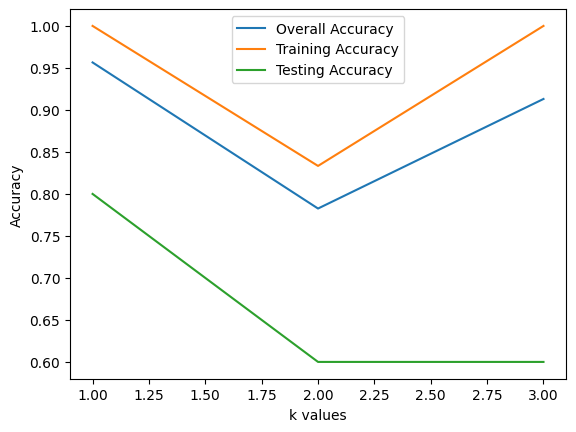

In [58]:
import matplotlib.pyplot as plt
plt.plot(neighbors,overall_accuracy,label="Overall Accuracy")
plt.plot(neighbors,training_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()